## Начало лабы №7

Загрузка даанных

In [3]:
import pandas as pd
df = pd.read_csv("..//static//csv//FINAL_USO.csv")
print(df.columns)
display(df.head())

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'SP_open', 'SP_high', 'SP_low', 'SP_close', 'SP_Ajclose', 'SP_volume',
       'DJ_open', 'DJ_high', 'DJ_low', 'DJ_close', 'DJ_Ajclose', 'DJ_volume',
       'EG_open', 'EG_high', 'EG_low', 'EG_close', 'EG_Ajclose', 'EG_volume',
       'EU_Price', 'EU_open', 'EU_high', 'EU_low', 'EU_Trend', 'OF_Price',
       'OF_Open', 'OF_High', 'OF_Low', 'OF_Volume', 'OF_Trend', 'OS_Price',
       'OS_Open', 'OS_High', 'OS_Low', 'OS_Trend', 'SF_Price', 'SF_Open',
       'SF_High', 'SF_Low', 'SF_Volume', 'SF_Trend', 'USB_Price', 'USB_Open',
       'USB_High', 'USB_Low', 'USB_Trend', 'PLT_Price', 'PLT_Open', 'PLT_High',
       'PLT_Low', 'PLT_Trend', 'PLD_Price', 'PLD_Open', 'PLD_High', 'PLD_Low',
       'PLD_Trend', 'RHO_PRICE', 'USDI_Price', 'USDI_Open', 'USDI_High',
       'USDI_Low', 'USDI_Volume', 'USDI_Trend', 'GDX_Open', 'GDX_High',
       'GDX_Low', 'GDX_Close', 'GDX_Adj Close', 'GDX_Volume', 'USO_Open',
       'USO_Hig

Date        Open        High         Low       Close   Adj Close  \
0  2011-12-15  154.740005  154.949997  151.710007  152.330002  152.330002   
1  2011-12-16  154.309998  155.369995  153.899994  155.229996  155.229996   
2  2011-12-19  155.479996  155.860001  154.360001  154.869995  154.869995   
3  2011-12-20  156.820007  157.429993  156.580002  156.979996  156.979996   
4  2011-12-21  156.979996  157.529999  156.130005  157.160004  157.160004   

     Volume     SP_open     SP_high      SP_low  ...    GDX_Low  GDX_Close  \
0  21521900  123.029999  123.199997  121.989998  ...  51.570000  51.680000   
1  18124300  122.230003  122.949997  121.300003  ...  52.040001  52.680000   
2  12547200  122.059998  122.320000  120.029999  ...  51.029999  51.169998   
3   9136300  122.180000  124.139999  120.370003  ...  52.369999  52.990002   
4  11996100  123.930000  124.360001  122.750000  ...  52.419998  52.959999   

   GDX_Adj Close  GDX_Volume   USO_Open   USO_High    USO_Low  USO_Close  \
0      48.973877    20605600  36.900002  36.939999  36.049999  36.130001   
1      49.921513    16285400  36.180000  36.500000  35.730000  36.270000   
2      48.490578    15120200  36.389999  36.450001  35.930000  36.200001   
3      50.215282    11644900  37.299999  37.610001  37.220001  37.560001   
4      50.186852     8724300  37.669998  38.240002  37.520000  38.110001   

   USO_Adj Close  USO_Volume  
0      36.130001    12616700  
1      36.270000    12578800  
2      36.200001     7418200  
3      37.560001    10041600  
4      38.110001    10728000  

[5 rows x 81 columns]

**Создание лингвистических переменных**

Входные переменные: OF_Price (цены на нефть) и SF_Price (цена на серебро) . \
Выходная переменная: Adj Close (цена).

In [4]:
import numpy as np
from skfuzzy import control as ctrl


# Инициализация лингвистических переменных
oil_price = ctrl.Antecedent(np.arange(df['OF_Price'].min(), df['OF_Price'].max(), 10), "oil_price")
silver_price = ctrl.Antecedent(np.arange(df['SF_Price'].min(), df['SF_Price'].max(), 1000), "silver_price")
adj_close = ctrl.Consequent(np.arange(df['Adj Close'].min(), df['Adj Close'].max(), 10), "adj_close")

**Формирование нечетких переменных для лингвистических переменных и их визуализация**

c:\Users\Алина\AppData\Local\Programs\Python\Python312\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


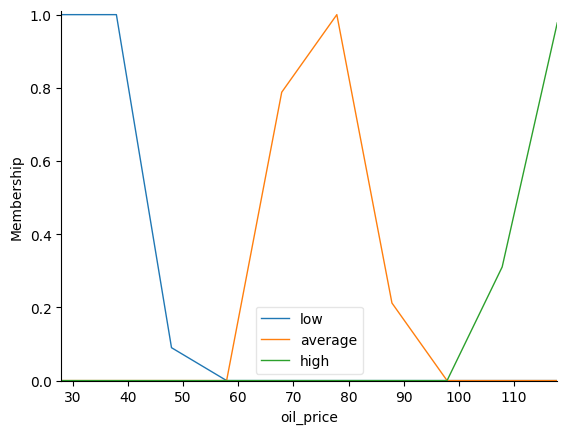

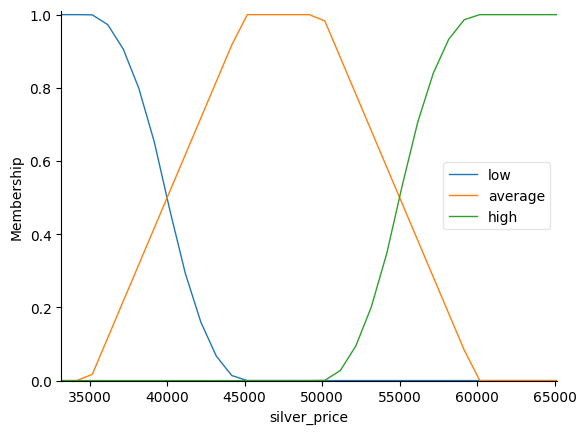

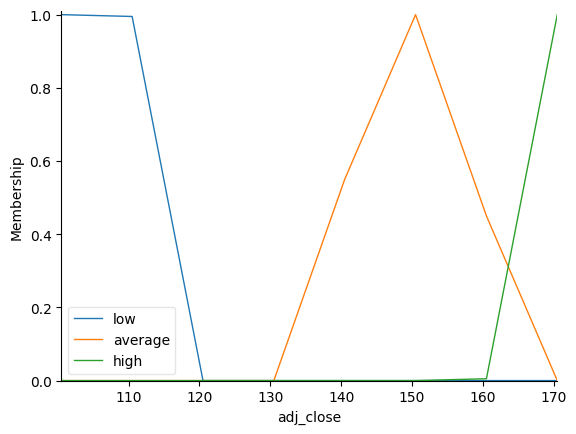

In [5]:
import skfuzzy as fuzz

oil_price['low'] = fuzz.zmf(oil_price.universe, 40, 50)
oil_price['average'] = fuzz.trapmf(oil_price.universe, [60, 70, 80, 90])
oil_price['high'] = fuzz.smf(oil_price.universe, 100, 120)

silver_price['low'] = fuzz.zmf(silver_price.universe, 35000, 45000)
silver_price['average'] = fuzz.trapmf(silver_price.universe, [35000, 45000, 50000, 60000])
silver_price['high'] = fuzz.smf(silver_price.universe, 50000, 60000)

adj_close['low'] = fuzz.zmf(adj_close.universe,110, 120)
adj_close['average'] = fuzz.trapmf(adj_close.universe, [135, 145, 155, 165])
adj_close['high'] = fuzz.smf(adj_close.universe, 160, 170)

oil_price.view()
silver_price.view()
adj_close.view()

**Формирование и визуализация базы нечетких правил**


(<Figure size 640x480 with 1 Axes>, <Axes: >)

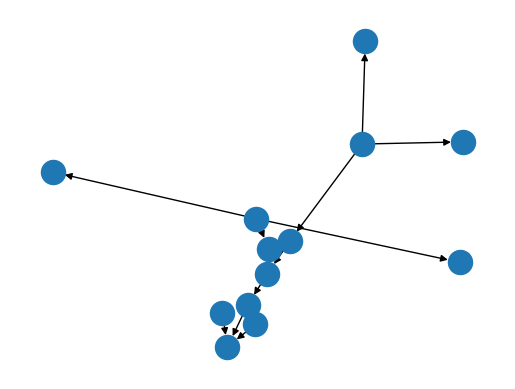

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
# Нечеткие правила
rule1 = ctrl.Rule(silver_price["low"] & oil_price["low"], adj_close["low"])
rule2 = ctrl.Rule(silver_price["low"] & oil_price["average"], adj_close["low"])
rule3 = ctrl.Rule(silver_price["low"] & oil_price["high"], adj_close["low"])
rule4 = ctrl.Rule(silver_price["average"] & oil_price["low"], adj_close["low"])
rule5 = ctrl.Rule(silver_price["average"] & oil_price["average"], adj_close["low"])
rule6 = ctrl.Rule(silver_price["average"] & oil_price["high"], adj_close["low"])
rule7 = ctrl.Rule(silver_price["high"] & oil_price["low"], adj_close["average"])
rule8 = ctrl.Rule(silver_price["high"] & oil_price["average"], adj_close["high"])
rule9 = ctrl.Rule(silver_price["high"] & oil_price["high"], adj_close["high"])
rule1.view()

**Создание нечеткой системы и добавление нечетких правил в базу знаний нечеткой системы**

In [7]:
price_ctrl = ctrl.ControlSystem(
    [
        rule1,
        rule2,
        rule3,
        rule4,
        rule5,
        rule6,
        rule7,
        rule8,
        rule9,
    ]
)

# Создание симулятора нечеткой системы
price_sim = ctrl.ControlSystemSimulation(price_ctrl)

**Пример расчета выходной переменной adj_close на основе входных переменных silver_price и oil_price** \
Система также формирует подробный журнал выполнения процесса нечеткого логического вывода

In [8]:
price_sim.input['silver_price'] = 60000
price_sim.input['oil_price'] = 30
price_sim.compute()

price_sim.print_state()

price_sim.output["adj_close"]

 Antecedents 
Antecedent: silver_price            = 60000
  - low                             : 0.0
  - average                         : 0.014110000000000011
  - high                            : 0.99765774
Antecedent: oil_price               = 30
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0

 Rules 
RULE #0:
  IF silver_price[low] AND oil_price[low] THEN adj_close[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - silver_price[low]                                      : 0.0
  - oil_price[low]                                         : 1.0
                      silver_price[low] AND oil_price[low] = 0.0
  Activation (THEN-clause):
                                            adj_close[low] : 0.0

RULE #1:
  IF silver_price[low] AND oil_price[average] THEN adj_close[low]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-cl

np.float64(149.4518344511302)

**Визуализация функции принадлежности для выходной переменной adj_close** \
Функция получена в процессе аккумуляции и используется для дефаззификации значения выходной переменной influx

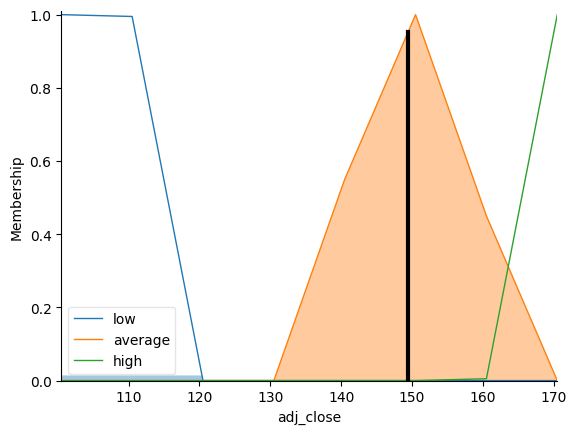

In [9]:
adj_close.view(sim=price_sim)

**Функция для автоматизации вычисления целевой переменной Y на основе вектора признаков X**

In [10]:
def fuzzy_pred(row):
    price_sim.input["silver_price"] = row["SF_Price"]
    price_sim.input["oil_price"] = row["OF_Price"]
    price_sim.compute()
    return price_sim.output["adj_close"]

**Создадим выборки**

In [11]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
df=pd.read_csv("..//static//csv//FINAL_USO.csv")
# Разделение данных на обучающую и временную выборки
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)

# Разделение остатка на контрольную и тестовую выборки
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

# Проверка размеров выборок
print("Размер обучающей выборки:", len(train_df))
print("Размер контрольной выборки:", len(val_df))
print("Размер тестовой выборки:", len(test_df))

# Сохранение выборок в файлы
train_df.to_csv("..//static//csv//train_data.csv", index=False)
val_df.to_csv("..//static//csv//val_data.csv", index=False)
test_df.to_csv("..//static//csv//test_data.csv", index=False)



Размер обучающей выборки: 1030
Размер контрольной выборки: 344
Размер тестовой выборки: 344


#### Тестирование нечеткой системы на обучающей выборке

In [12]:
import pandas as pd
train_df = pd.read_csv("..//static//csv//train_data.csv")

result_train = train_df.copy()


result_train["Adj_Pred"] = result_train.apply(fuzzy_pred, axis=1)
selected_cm=result_train[['Adj Close','Adj_Pred']]
selected_cm.head(15)

Adj Close    Adj_Pred
0   168.000000  132.711304
1   112.570000  109.439084
2   152.619995  128.709309
3   114.099998  108.918805
4   122.370003  109.132519
5   110.739998  110.375791
6   120.339996  109.223112
7   108.529999  110.299032
8   155.990005  117.828747
9   152.619995  121.754787
10  114.690002  108.616706
11  116.720001  110.457826
12  133.919998  110.305503
13  124.389999  109.329683
14  124.230003  110.301482

#### Тестирование нечеткой системы на тестовой выборке

In [13]:
import pandas as pd
test_df=pd.read_csv("..//static//csv//test_data.csv")
result_test = test_df.copy()

result_test["Adj_Pred"] = result_test.apply(fuzzy_pred, axis=1)

selected_cm=result_test[['Adj Close','Adj_Pred']]
selected_cm.head(25)

Adj Close    Adj_Pred
0   160.539993  128.238594
1   121.610001  110.497064
2   126.160004  110.071318
3   160.990005  140.910239
4   173.610001  166.750349
5   118.970001  109.816155
6   126.680000  110.114797
7   117.519997  109.198624
8   126.730003  108.938702
9   120.309998  109.184898
10  114.419998  108.741448
11  124.540001  108.944347
12  115.430000  110.299438
13  118.220001  108.951590
14  121.050003  110.494061
15  106.220001  109.940389
16  109.139999  110.391316
17  112.239998  109.468082
18  122.879997  110.134215
19  117.290001  110.449270
20  127.400002  109.444150
21  171.020004  137.399711
22  118.120003  109.795655
23  119.430000  109.759950
24  115.800003  108.872375

#### Тестирование нечёткой системы на контрольной выборке

In [14]:
import pandas as pd
val_df=pd.read_csv("..//static//csv//val_data.csv")
result_val = val_df.copy()

result_val["Adj_Pred"] = result_val.apply(fuzzy_pred, axis=1)

selected_cm=result_val[['Adj Close','Adj_Pred']]
selected_cm.head(25)

Adj Close    Adj_Pred
0   117.589996  110.097248
1   121.650002  110.271389
2   166.339996  142.876180
3   116.309998  108.741349
4   115.199997  110.496041
5   126.940002  108.680121
6   127.480003  109.792704
7   120.779999  110.364663
8   151.619995  128.584492
9   118.290001  109.618055
10  122.860001  109.200848
11  118.360001  108.620161
12  123.320000  109.627409
13  120.650002  110.362873
14  161.509995  134.425928
15  120.589996  110.368020
16  120.959999  109.829655
17  115.989998  108.705900
18  120.989998  109.897227
19  168.789993  166.732904
20  114.290001  110.455799
21  114.209999  110.445220
22  115.050003  108.355848
23  118.860001  109.210694
24  120.050003  109.578323

#### Оценка результатов на основе метрик для задачи регрессии

In [15]:
import math
from sklearn import metrics


rmetrics = {}
rmetrics["RMSE_train"] = math.sqrt(
    metrics.mean_squared_error(result_train["Adj Close"], result_train["Adj_Pred"])
)
rmetrics["RMSE_test"] = math.sqrt(
    metrics.mean_squared_error(result_test["Adj Close"], result_test["Adj_Pred"])
)
rmetrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(result_test["Adj Close"], result_test["Adj_Pred"])
)
rmetrics["R2_test"] = metrics.r2_score(
    result_test["Adj Close"], result_test["Adj_Pred"]
)

rmetrics

{'RMSE_train': 15.892710880956223,
 'RMSE_test': 15.519716842963696,
 'RMAE_test': 3.6146976330239697,
 'R2_test': 0.16348948741550218}